**TOPIC ANALYSIS CANZONI**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath = '/content/drive/MyDrive/statistica spaziale2/'

In [ ]:
import dill 
dill.load_session(filepath+'topic_analysis1.pkl')


### Importiamo il dataset

Importiamo il dataset

In [ ]:
import pandas as pd
df = pd.read_csv(filepath+'data/tcc_ceds_music.csv')
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [ ]:
#controllo valori mancanti
df.isna().sum()

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

In [ ]:
#valori unici del target
df.topic.value_counts()

sadness       6096
violence      5710
world/life    5420
obscene       4882
music         2303
night/time    1825
romantic      1524
feelings       612
Name: topic, dtype: int64

Raggruppiamo i due livelli word/life e feeling in unico livello 'life' (tot. 7 livelli)


In [ ]:
def raggruppamento(row):
  if row['topic'] == 'world/life':
    value = 'life' 
  elif row['topic'] == 'feelings':
    value = 'life'
  else:
    value = row['topic']
  return value 

df['new_topic'] = df.apply(raggruppamento, axis=1)
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,new_topic
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000,sadness
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000,life
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000,music
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000,romantic
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000,romantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286,obscene
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286,obscene
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286,obscene
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286,obscene


In [ ]:
df.new_topic.value_counts()

sadness       6096
life          6032
violence      5710
obscene       4882
music         2303
night/time    1825
romantic      1524
Name: new_topic, dtype: int64

In [ ]:
#definiamo la colonna con tutti i testi raw delle canzoni
raw_text = df['lyrics']

### Pre-process e pulizia del testo

In [ ]:
raw_text[0]
# testo già parzialmente pulito 

'hold time feel break feel untrue convince speak voice tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little turn dust play house ruin run leave save like chase train late late tear try hold hurt try forgive okay play break string feel heart want feel tell real truth hurt lie worse anymore little run leave save like chase train know late late play break string feel heart want feel tell real truth hurt lie worse anymore little know little hold time feel'

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Lemmatization

In [ ]:
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

text = raw_text.str.lower().str.replace('[^\w\s\d]',' ', regex=True) # \d tiene anche i caratteri numerici
text = text.str.split()
%time text = text.apply(lambda x: [lemmatizer.lemmatize(sent) for sent in x])
for row in text:
    [row.remove(i) for i in row if len(i) < 2]
text.head()
#output: insieme di liste di parole

CPU times: user 10.5 s, sys: 142 ms, total: 10.7 s
Wall time: 10.7 s


0    [hold, time, feel, break, feel, untrue, convin...
1    [believe, drop, rain, fall, grow, believe, dar...
2    [sweetheart, send, letter, goodbye, secret, fe...
3    [kiss, lip, want, stroll, charm, mambo, chacha...
4    [till, darling, till, matter, know, till, drea...
Name: lyrics, dtype: object

N-gram e Bi-gram

In [ ]:
from gensim.models.phrases import Phrases
from nltk.corpus import stopwords
connectors = stopwords.words('english')

# bigram = Phrases(text, min_count=5, threshold=0.2, connector_words=connectors) #gensim 4
%time bigram = Phrases(text, min_count=5, threshold=0.2, common_terms=connectors) #gensim 3
%time bigrams = [bigram[item] for item in text]

# ngram = Phrases(bigrams, min_count=5, threshold=0.2, connector_words=connectors) # gensim 4
%time ngram = Phrases(bigrams, min_count=5, threshold=0.2, common_terms=connectors) # gensim 3
%time ngrams = [ngram[item] for item in bigrams]

TypeError: ignored

Eliminiamo gli ngrams con parole uguali

In [ ]:
controllo=[]
for li in ngrams:
  for el in li:
    l=el.split('_')
    if len(l)==2:
      if l[0]==l[1]:
        li.remove(el)
        controllo.append(el)
    elif len(l)==3:
      if l[0]==l[1]==l[2]:
        li.remove(el)
        controllo.append(el)

Rimozione delle stopwords e aggiunta di n-grams 

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop.extend(['mmmmm', 'instrumental_break'])
train_sentences = []
for row in ngrams:
    train_sentences.append([item for item in row if item not in stop])
print(train_sentences[0]) 

Creiamo una lista di stringhe dove le parole sono separate dallo spazio 

In [ ]:
train_sentences1=[]
for el in train_sentences:
    train_sentences1.append(' '.join(el))

In [ ]:
#visualizziamo
train_sentences1[0]

'hold_time feel_break feel untrue convince speak_voice tear_try hold hurt_try forgive okay play break_string feel_heart want_feel tell_real truth_hurt lie worse anymore_little turn_dust play_house ruin run leave_save like_chase train tear_try hold hurt_try forgive okay play break_string feel_heart want_feel tell_real truth_hurt lie worse anymore_little run leave_save like_chase train know_late late play break_string feel_heart want_feel tell_real truth_hurt lie worse anymore_little know_little hold_time feel'

Rimozione canzoni con meno di 5 parole nel testo

In [ ]:
indice1= [i for i in range(len(train_sentences1)) if len(train_sentences1[i]) < 5]
len(indice1)

4

In [ ]:
indice1

[18097, 18885, 20580, 20800]

In [ ]:
train_sentences1[20800]

'felt'

In [ ]:
train_sentences2=train_sentences1.copy()
del train_sentences2[18885]

In [ ]:
del train_sentences2[20799]

In [ ]:
del train_sentences2[18097]

In [ ]:
del train_sentences2[20578]

### WORD EMBEDDINGS
Stima modello FastText

In [ ]:
!pip install gensim -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 59.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from gensim.models import FastText

%time ft_model = FastText(sg=0, hs=1, sentences=train_sentences, vector_size=100, window=5, min_count=5, epochs=5, min_n=3, max_n=6) #gensim 4

CPU times: user 4min 26s, sys: 683 ms, total: 4min 27s
Wall time: 2min 33s


In [ ]:
ft_model.save(filepath+'/ft_model_gensim4.vec')

In [ ]:
ft_model.wv.vectors_ngrams

array([[ 6.7515089e-03, -4.7677588e-03, -7.8138923e-03, ...,
        -7.9859281e-03,  2.1929742e-05, -9.2279194e-03],
       [ 4.4298411e-04,  4.0389872e-03,  1.5851617e-03, ...,
        -7.0407437e-03,  9.2093442e-03, -5.8022714e-03],
       [ 5.3175022e-03, -1.1899114e-03,  5.4316879e-03, ...,
        -7.6474883e-03, -7.6373150e-03,  9.3556950e-03],
       ...,
       [-2.2869252e-03, -3.7503266e-03, -2.5149847e-03, ...,
         1.4015245e-03,  3.0747771e-03,  8.4030982e-03],
       [-6.0103653e-04,  4.4853329e-03, -4.5032143e-03, ...,
         7.4430513e-03, -4.4770148e-03,  1.7699481e-03],
       [-6.2964391e-03,  5.1660539e-04,  5.2967072e-05, ...,
         6.0262918e-03,  7.1268915e-03, -2.7080083e-03]], dtype=float32)

In [ ]:
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("fasttext_gensim4.model")
ft_model.save(fname)

### STIMA MODELLO 

Vettorizzazione dei testi con TFIDF

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#vectorizer = CountVectorizer(ngram_range=(1, 1), max_features=1000)   #countvectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000).fit(train_sentences2)  #TFIDF
x = vectorizer.transform(train_sentences2)
feature_names = vectorizer.get_feature_names()
x = x.toarray()
x = np.array(x)
y = np.array(df['new_topic'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# import pickle
# pickle.dump(vectorizer, open(filepath+'vectorizer.sav', 'wb'))

In [ ]:
y=np.delete(y, 18885)
y=np.delete(y, 20799)
y=np.delete(y, 18097)
y=np.delete(y, 20578)

split in train e test 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

## Stima modello random forest 

In [ ]:
from tqdm import tqdm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
import random 
random.seed(5)
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#cross_validated_grid_search for Random Forest
model = RandomForestClassifier(class_weight='balanced')  #alternativa a balanced è 'custom'
param_grid = {'n_estimators': [10, 100],
               'criterion': ['gini', 'entropy'],
               'max_depth': [None, 5, 10],
               'min_samples_split': [2, 10, 20]}

#cross_validated_grid_search for SVC
# model = svm.SVC()
# param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv=3, verbose=2, n_jobs=-1, scoring='f1_weighted')
# Fit the random search model
%time grid_result = grid.fit(x_train, y_train)

#print grid search results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
CPU times: user 1min 5s, sys: 1.05 s, total: 1min 6s
Wall time: 10min 41s
Best: 0.565861 using {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
0.513352 (0.003221) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}
0.565861 (0.003553) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
0.525640 (0.003343) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 10}
0.565032 (0.001521) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
0.523544 (0.004363) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 20, 'n_estimators': 10}
0.563650 (0.001953) with: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 20, 'n_estimators': 100}
0.330656 (0.025878) with: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split':

Visualizzazione delle metriche 

In [ ]:
from sklearn.metrics import classification_report
best_model = grid_result.best_estimator_
predicted = best_model.predict(x_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

        life       0.54      0.54      0.54      1809
       music       0.50      0.55      0.53       691
  night/time       0.38      0.38      0.38       547
     obscene       0.72      0.77      0.74      1465
    romantic       0.45      0.40      0.42       457
     sadness       0.56      0.55      0.56      1829
    violence       0.61      0.59      0.60      1713

    accuracy                           0.57      8511
   macro avg       0.54      0.54      0.54      8511
weighted avg       0.57      0.57      0.57      8511



In [ ]:
# import pickle
# pickle.dump(best_model, open(filepath+'modello.sav', 'wb'))

Selezioniamo soltanto le canzoni che sono state correttamente classificate dalla random forest attraverso un indice


In [ ]:
prediction = best_model.predict(x_train)

In [ ]:
indice=[i for i in range(len(y_train)) if y_train[i]==prediction[i]]

Creazione del nuovo dataset di training per modello surrogato (contiene soltanto le canzoni correttamente classificate dalla random forest)

In [ ]:
x_train_OK = x_train[indice]
y_train_OK = y_train[indice]

In [ ]:
print(len(x_train_OK))
print(len(y_train_OK))
print(len(indice))

19678
19678
19678


### Stima modello logistico surrogato

In [ ]:
import random 
random.seed(5)
from tqdm import tqdm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
#surr = tree.DecisionTreeClassifier(max_depth=20)
surr = LogisticRegression(class_weight=None, max_iter=150)
#model = RandomForestClassifier()

cvscores = []
cvrecall = []

pred = best_model.predict(x_train_OK)

for train, test in tqdm(kfold.split(x_train_OK, pred)):
    surr.fit(x_train_OK[train],pred[train])
    predicted = surr.predict(x_train_OK[test])
    scores = accuracy_score(predicted, pred[test])
    recall = recall_score(predicted, pred[test], average=None)
    cvrecall.append(recall)
    cvscores.append(scores * 100)

print(cvscores)

3it [00:43, 14.56s/it]

[64.77584629460202, 63.672411163641904, 64.20619185603172]


metriche 

In [ ]:
from sklearn.metrics import classification_report
#best_model = grid_resultALBERO.best_estimator_
best_model_LOG = surr
predicted_LOG = best_model_LOG.predict(x_train_OK)
print(classification_report(y_train_OK, predicted_LOG))

              precision    recall  f1-score   support

        life       0.62      0.70      0.66      4170
       music       0.74      0.58      0.65      1591
  night/time       0.62      0.35      0.45      1274
     obscene       0.82      0.84      0.83      3409
    romantic       0.68      0.41      0.51      1048
     sadness       0.65      0.71      0.68      4203
    violence       0.71      0.77      0.74      3977

    accuracy                           0.69     19672
   macro avg       0.69      0.62      0.64     19672
weighted avg       0.69      0.69      0.69     19672



In [ ]:
coeff=best_model_LOG.coef_

Ora dai 1000 elementi (coefficienti) ottenuti possiamo risalire alle parole associate 

In [ ]:
df1=pd.DataFrame([])
df1['parole']=feature_names
df1['coefficienti']=coeff[0]

In [ ]:
df1['|coefficienti|']=abs(df1['coefficienti'])

In [ ]:
df1.sort_values(by='|coefficienti|', ascending=False, inplace=True)

In [ ]:
df1

,parole,coefficienti,|coefficienti|
471,life,3.629533,3.629533
985,world,3.476741,3.476741
484,live,3.282309,3.282309
485,live_life,3.137639,3.137639
110,change,2.922043,2.922043
...,...,...,...
442,knee,-0.003424,0.003424
644,radio,-0.002050,0.002050
347,goin,-0.001771,0.001771
372,half,-0.001442,0.001442


Osserviamo i plot delle parole con i loro relativi coefficienti

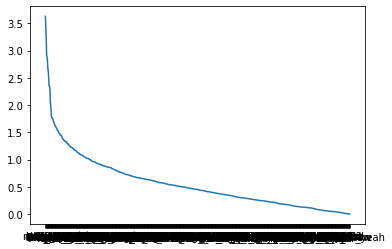

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1['parole'],df1['|coefficienti|'])

In [ ]:
df1[df1['|coefficienti|']>=1.2]

,parole,coefficienti,|coefficienti|
471,life,3.629533,3.629533
985,world,3.476741,3.476741
484,live,3.282309,3.282309
485,live_life,3.137639,3.137639
110,change,2.922043,2.922043
...,...,...,...
559,nigga,-1.222354,1.222354
345,go,1.220138,1.220138
701,save,1.216907,1.216907
479,lip,-1.213049,1.213049


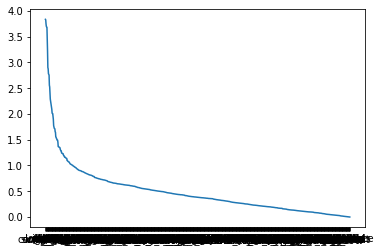

In [ ]:
df2=pd.DataFrame([])
df2['parole']=feature_names
df2['coefficienti']=coeff[1]
df2['|coefficienti|']=abs(df2['coefficienti'])
df2.sort_values(by='|coefficienti|', ascending=False, inplace=True)
plt.plot(df2['parole'],df2['|coefficienti|'])

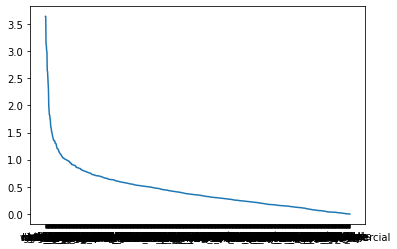

In [ ]:
df3=pd.DataFrame([])
df3['parole']=feature_names
df3['coefficienti']=coeff[2]
df3['|coefficienti|']=abs(df3['coefficienti'])
df3.sort_values(by='|coefficienti|', ascending=False, inplace=True)
plt.plot(df3['parole'],df3['|coefficienti|'])

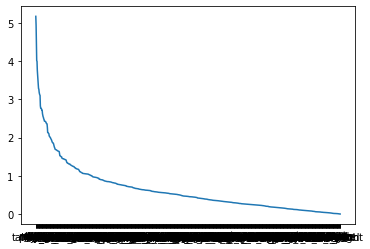

In [ ]:
df4=pd.DataFrame([])
df4['parole']=feature_names
df4['coefficienti']=coeff[3]
df4['|coefficienti|']=abs(df4['coefficienti'])
df4.sort_values(by='|coefficienti|', ascending=False, inplace=True)
plt.plot(df4['parole'],df4['|coefficienti|'])

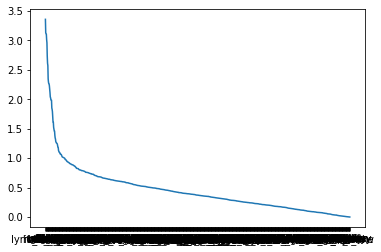

In [ ]:
df5=pd.DataFrame([])
df5['parole']=feature_names
df5['coefficienti']=coeff[4]
df5['|coefficienti|']=abs(df5['coefficienti'])
df5.sort_values(by='|coefficienti|', ascending=False, inplace=True)
plt.plot(df5['parole'],df5['|coefficienti|'])

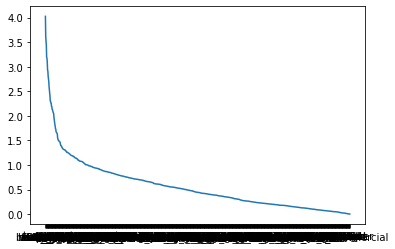

In [ ]:
df6=pd.DataFrame([])
df6['parole']=feature_names
df6['coefficienti']=coeff[5]
df6['|coefficienti|']=abs(df6['coefficienti'])
df6.sort_values(by='|coefficienti|', ascending=False, inplace=True)
plt.plot(df6['parole'],df6['|coefficienti|'])

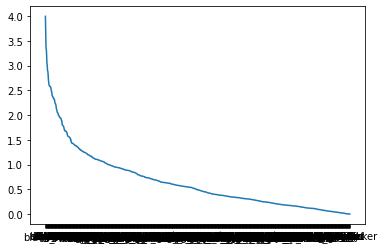

In [ ]:
df7=pd.DataFrame([])
df7['parole']=feature_names
df7['coefficienti']=coeff[6]
df7['|coefficienti|']=abs(df7['coefficienti'])
df7.sort_values(by='|coefficienti|', ascending=False, inplace=True)
plt.plot(df7['parole'],df7['|coefficienti|'])

Scegliamo le parole più importanti

In [ ]:
print(len(df1[df1['|coefficienti|']>=1.2]))
print(len(df2[df2['|coefficienti|']>=1.2]))
print(len(df3[df3['|coefficienti|']>=1.2]))
print(len(df4[df4['|coefficienti|']>=1.2]))
print(len(df5[df5['|coefficienti|']>=1.2]))
print(len(df6[df6['|coefficienti|']>=1.2]))
print(len(df7[df7['|coefficienti|']>=1.2]))

91
60
40
132
41
84
139


Prendiamo le 85 parole più importanti per ogni livello

In [ ]:
life=list(df1['parole'][0:85])

In [ ]:
music=list(df2['parole'][0:85])

In [ ]:
night_time=list(df3['parole'][0:85])

In [ ]:
obscene=list(df4['parole'][0:85])

In [ ]:
romantic=list(df5['parole'][0:85])

In [ ]:
sadness=list(df6['parole'][0:85])

In [ ]:
violence=list(df7['parole'][0:85])

In [ ]:
print(life)
print(music)
print(night_time)
print(obscene)
print(romantic)
print(sadness)
print(violence)

['life', 'world', 'live', 'live_life', 'change', 'believe', 'thank', 'life_live', 'remember', 'way', 'search', 'day', 'today', 'tomorrow', 'give', 'learn', 'happiness', 'feel_good', 'hear', 'forgive', 'straight', 'dream', 'grow', 'wife', 'yesterday', 'trust', 'sorrow', 'teach', 'count', 'choose', 'forever', 'future', 'mouth', 'put', 'room', 'promise', 'spend', 'show', 'everyday', 'crawl', 'answer', 'share', 'change_mind', 'sleep', 'shut', 'neck', 'forget', 'tryin', 'small', 'reason', 'settle', 'morning', 'cold', 'perfect', 'rainbow', 'regret', 'drop', 'true', 'wander', 'blow', 'sure', 'view', 'lick', 'imagine', 'moment', 'year', 'knock', 'hop', 'kick', 'pound', 'end', 'road', 'brain', 'struggle', 'tell', 'beat', 'good_time', 'shame', 'come_home', 'swing', 'close', 'night', 'play_game', 'smoke', 'pas']
['sing_song', 'sing', 'song', 'music', 'guitar', 'song_sing', 'home', 'blue', 'come_home', 'tune', 'call', 'hear', 'listen', 'lonesome', 'play', 'radio', 'band', 'spring', 'note', 'blow',

##Salviamo quello fatto fino ad ora


In [ ]:
import dill 
fileName='/content/drive/MyDrive/statistica spaziale2/topic_analysis1.pkl'
dill.dump_session(fileName)